In [2]:
import mido
import numpy as np
from matplotlib import pyplot as plt

import time

In [2]:
mido.get_output_names()

['Microsoft GS Wavetable Synth 0']

In [6]:
port = mido.open_output('Microsoft GS Wavetable Synth 0')

In [8]:
mid = mido.MidiFile("cs1-1pre.mid")
#mid = mido.MidiFile("Howl - Merry-Go-Round of Life.mid")

In [6]:
len(mid.tracks)

14

In [9]:

for msg in mid:
    #time.sleep(msg.time)

    print(msg, end="\n\n")
    if not msg.is_meta:
       
        time.sleep(msg.time)

        #port.send(msg)
        pass
        
        
    else:
        #print(msg.time)
        #time.sleep(msg.time)

        pass

#port.reset()

MetaMessage('track_name', name='untitled', time=0)

MetaMessage('smpte_offset', frame_rate=25, hours=32, minutes=0, seconds=3, frames=0, sub_frames=0, time=0)

MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0)

MetaMessage('key_signature', key='G', time=0)

MetaMessage('set_tempo', tempo=750000, time=0)

MetaMessage('midi_port', port=0, time=0)

MetaMessage('track_name', name='Solo Cello', time=0)

program_change channel=0 program=42 time=0

control_change channel=0 control=7 value=100 time=0

control_change channel=0 control=10 value=64 time=0

note_on channel=0 note=43 velocity=100 time=0

MetaMessage('midi_port', port=0, time=0)

MetaMessage('track_name', name='--------------------------------------', time=0)

program_change channel=1 program=42 time=0

control_change channel=1 control=7 value=100 time=0

control_change channel=1 control=10 value=74 time=0

MetaMessage('midi_port', port=0, time=0)

MetaMessage('trac

In [8]:
port.reset()

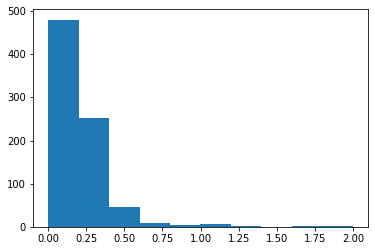

In [4]:
times = []
notes = []

for msg in mid:
    times.append(msg.time)

    if not msg.is_meta:
        if msg.type == 'note_on':
            notes.append(msg.note)
    

times = np.array(times)

time_nonzero = times[np.nonzero(times)]

plt.hist(time_nonzero)
plt.show()

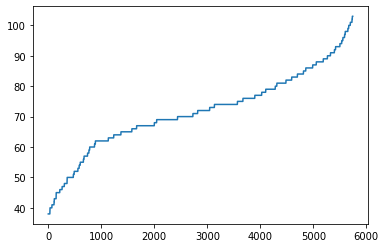

In [7]:
plt.plot(np.sort(notes))

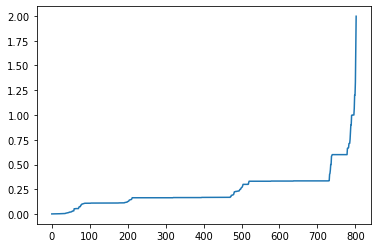

In [8]:
plt.plot(np.sort(time_nonzero))
plt.show()

In [9]:
values, counts = np.unique(time_nonzero, return_counts=True)

values[counts>=75]

array([0.16493039, 0.1666665 , 0.16840261, 0.33506911])

In [75]:
time_rounded = np.around(time_nonzero, decimals=1)

values, counts = np.unique(time_rounded, return_counts=True)

values[counts>=8]

array([0. , 0.1, 0.2, 0.3, 0.6])

In [16]:
np.unique(counts, return_counts=True)

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  11,  13,  15,  32,
         40,  95, 108, 109, 117, 151], dtype=int64),
 array([17, 11,  3,  4,  2,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1], dtype=int64))

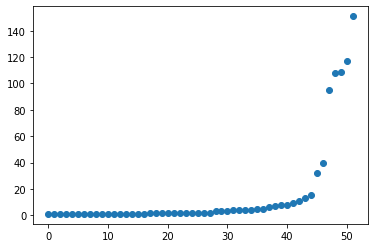

In [20]:
plt.plot(np.sort(counts))


In [22]:
np.mean(counts)

15.442307692307692

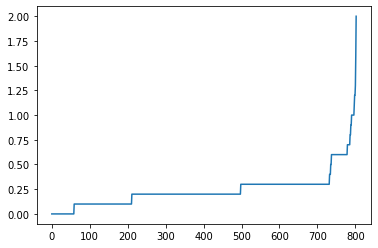

In [27]:
plt.plot(np.sort(time_rounded))

In [60]:
msg = mido.Message("note_on", note=60, time=0.6)

port.send(msg)

time.sleep(msg.time)
port.reset()

In [61]:
values

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.6, 2. ])

In [62]:
counts

array([ 59, 152, 287, 234,   3,   2,  42,   7,   2,   2,   7,   1,   2,
         1,   1,   1], dtype=int64)

In [74]:
np.ceil(np.power(counts.prod(), 1.0/counts.shape[0]))

8.0

In [27]:
time_rounded = np.around(time_nonzero, decimals=1)

values, counts = np.unique(notes, return_counts=True)

counts = counts.astype(np.float64)

threshould = np.ceil(np.power(counts.prod(), 1.0/counts.shape[0]))

states = values[counts>=threshould]

states = states[np.nonzero(states)]

In [32]:
np.unique(counts >= threshould, return_counts=True)

(array([False,  True]), array([30, 35], dtype=int64))

In [29]:
states

array([45., 48., 50., 52., 55., 57., 60., 62., 63., 64., 65., 66., 67.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 81., 82.,
       83., 84., 86., 87., 88., 89., 90., 91., 93.])

In [88]:
time_states = time_nonzero.copy()

for i in range(time_states.shape[0]):
    index = (np.abs(states-time_states[i])).argmin()

    time_states[i] = states[index]

In [98]:
n_state = states.shape[0]
histogram = np.zeros((n_state, n_state), np.float64)

states_dict = {}

for i in range(n_state):
    states_dict[states[i]] = i

for i in range(1, time_states.shape[0]):
    prev_state = time_states[i-1]
    prev_state_index = states_dict[prev_state]

    next_state = time_states[i]
    next_state_index = states_dict[next_state]

    histogram[prev_state_index][next_state_index] += 1

histogram

array([[160.,  25.,  12.,  13.],
       [ 22., 217.,  47.,   1.],
       [ 22.,  44., 165.,   6.],
       [  7.,   1.,  12.,  48.]])

In [111]:
transition = histogram.copy()

for i in range(transition.shape[0]):
    transition[i] /= np.sum(histogram[i])


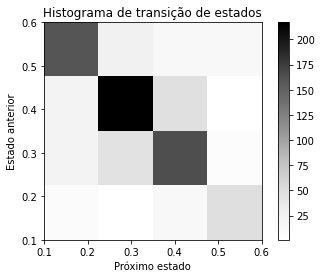

In [113]:
plt.imshow(histogram, extent=2*[states[0], states[-1]], cmap="Greys")
plt.title("Histograma de transição de estados")
plt.xlabel("Próximo estado")
plt.ylabel("Estado anterior")
plt.colorbar()
plt.show()

In [115]:
index = 0

for msg in mid:
    if msg.time != 0:
        time.sleep(time_states[index])
        index += 1
        
    if not msg.is_meta:
        port.send(msg)

In [116]:
port.reset()

In [36]:
np.ndarray((1000,1000))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
np.linspace(0.1,0.9,9)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [52]:
a = np.ndarray((0,0))

new_column = np.zeros(len(a))
new_line = np.zeros(len(a)+1)

In [66]:
a = np.ndarray((0,0))

size = a.shape[0]
a.resize((size+1, size+1))

size = a.shape[0]
a.resize((size+1, size+1))

size = a.shape[0]
a.resize((size+1, size+1))

a

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [65]:
a.shape

(2, 2)